In [4]:
## this script is to convert SAM index txt file to nc file so i can plot this against DOT, WSC, OSC ... then look at correlation etc

import numpy as np
import pandas as pd
import xarray as xr

# Load the data
txt_file = "/Users/iw2g24/PycharmProjects/SSH_project/Data/newsam.1957.2007.txt"  # file name
df = pd.read_csv(txt_file, delimiter=r"\s+", index_col=0)  #  first column (years) as the index

# Get years from index and months from columns
years = df.index.values
months = df.columns.values

# Create the date range (first of each month)
dates = pd.to_datetime([f"{year}-{month}-01" for year in years for month in months], format='%Y-%b-%d')
# set to 12:00:00 and nanoseconds precision
dates = pd.to_datetime([f"{date.strftime('%Y-%m-%d')}T12:00:00.000000000" for date in dates])


# Flatten the SAM values
sam_values = df.values.flatten()

# Create the xarray Dataset
ds = xr.Dataset(
    {
        "SAM": ("time", sam_values)  # 'SAM' variable with time dimension
    },
    coords={
        "time": dates  # Using the generated dates as the time coordinate
    }
)

ds.to_netcdf("monthly_sam.nc")

print(ds)



<xarray.Dataset> Size: 13kB
Dimensions:  (time: 828)
Coordinates:
  * time     (time) datetime64[ns] 7kB 1957-01-01T12:00:00 ... 2025-12-01T12:...
Data variables:
    SAM      (time) float64 7kB -0.87 -2.27 0.07 -1.97 -2.5 ... nan nan nan nan


In [12]:
import pandas as pd
import numpy as np
import xarray as xr

# Load the data
txt_file = "/Users/iw2g24/PycharmProjects/SSH_project/Data/newsam.1957.2007.seas.txt"  # Change this to your file name
df = pd.read_csv(txt_file, delimiter=r"\s+", index_col=0)  # Set the first column (years) as the index

# Get years
years = df.index.values  # [1957, 1958, ...]

# Define seasonal time coordinates
date_mapping = {
    'ANN': '12-01',  # Annual = December 1st
    'AUT': '09-01',  # Autumn = September 1st
    'WIN': '12-01',  # Winter = December 1st
    'SPR': '03-01',  # Spring = March 1st
    'SUM': '06-01',  # Summer = June 1st
}

# Create time coordinates for each season
time_coords = {season: pd.to_datetime([f"{year}-{date_mapping[season]}T12:00:00.000000000" for year in years])
               for season in df.columns}

# Create an xarray Dataset with separate coordinates for each season
ds = xr.Dataset(
    {
        "ANN_sam": (["year"], df["ANN"].values),
        "AUT_sam": (["year"], df["AUT"].values),
        "WIN_sam": (["year"], df["WIN"].values),
        "SPR_sam": (["year"], df["SPR"].values),
        "SUM_sam": (["year"], df["SUM"].values),
    },
    coords={
        "year": years,          # Year coordinate
        "ANN_time": ("year", time_coords["ANN"]),
        "AUT_time": ("year", time_coords["AUT"]),
        "WIN_time": ("year", time_coords["WIN"]),
        "SPR_time": ("year", time_coords["SPR"]),
        "SUM_time": ("year", time_coords["SUM"]),
    }
)

# Save the dataset to a NetCDF file
ds.to_netcdf("seas_sam.nc")
print("Conversion complete! File saved as seas.nc")

print(ds)

Frozen({'time': 828})

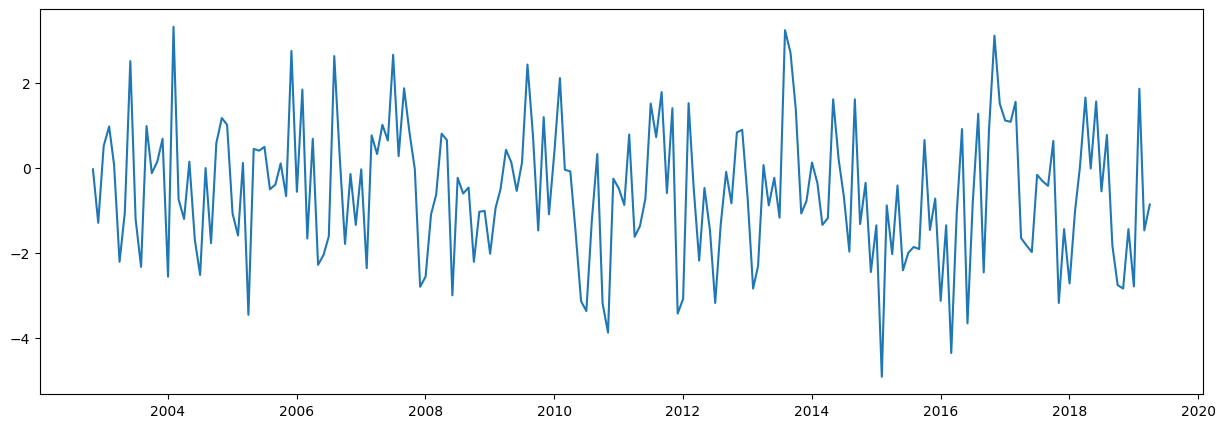